In [49]:
def importlibrerias():

    '''Importacion de las librerias que seran módulos necesarios para el desarrollo el algoritmo de arboles de decisión en el desarrollo del laboratorio '''
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
print(importlibrerias.__doc__)

Importacion de las librerias que seran módulos necesarios para el desarrollo el algoritmo de arboles de decisión en el desarrollo del laboratorio 


In [50]:
def carga():
    
    '''Cargar y leer el conjunto de datos de diabetes mediate la librería pandas'''
    
datos = pd.read_csv("Dataset of Diabetes.csv")
print(carga.__doc__)
datos

Cargar y leer el conjunto de datos de diabetes mediate la librería pandas


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [51]:
def selecC():
    
    '''Seleccionamos las colunma CLASS que contiene texto y sera transformada de forma numerica'''
    
print (datos.groupby("CLASS").size())
print(selecC.__doc__)

CLASS
N     102
N       1
P      53
Y     840
Y       4
dtype: int64
Seleccionamos las colunma CLASS que contiene texto y sera transformada de forma numerica


In [52]:
def selecG():

        '''Seleccionamos las colunma GENDER que contienen texto y sera transformada de forma numerica'''
print (datos.groupby("Gender").size())
print(selecG.__doc__)

Gender
F    434
M    565
f      1
dtype: int64
Seleccionamos las colunma GENDER que contienen texto y sera transformada de forma numerica


In [53]:
def limp():

        '''Seleccionamos las colunma GENDER y CLASS  para hacer la limpieza de datos'''

dataGender = {'M': 'M', 'F': 'F', 'f': 'F'}
datos['Gender'] = datos['Gender'].map(dataGender)
dataClass = {'N ':'N','N': 'N', 'Y':'Y', 'Y ': 'Y', 'P': 'P'}
datos['CLASS'] = datos['CLASS'].map(dataClass)
print(limp.__doc__)
datos

Seleccionamos las colunma GENDER y CLASS  para hacer la limpieza de datos


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [54]:
def selecCC():
    
    '''Seleccionamos las colunma CLASS que contiene texto y sera transformada de forma numerica'''
    
print (datos.groupby("CLASS").size())
print(selecCC.__doc__)

CLASS
N    103
P     53
Y    844
dtype: int64
Seleccionamos las colunma CLASS que contiene texto y sera transformada de forma numerica


In [55]:
def selecGG():

        '''Seleccionamos las colunma GENDER que contiene texto y sera transformada de forma numerica'''
print (datos.groupby("Gender").size())
print(selecGG.__doc__)

Gender
F    435
M    565
dtype: int64
Seleccionamos las colunma GENDER que contiene texto y sera transformada de forma numerica


In [56]:
def selecGe():

        '''Seleccionamos las colunma GENDER que contiene texto y sera transformada de forma numerica como se visualiza M tendra
        el valor de 0 y la ltera F tendra el valor de 1 y de igual manera la columna Class tendra el valor de N igual 0 , Y igual a 1
        y la P igual 2'''

dataGender = {'M': 0, 'F': 1}

datos['Gender'] = datos['Gender'].map(dataGender)
dataClass = {'N': 0,'Y': 1, 'P': 2}
datos['CLASS'] = datos['CLASS'].map(dataClass).fillna(0.0).astype(int)
print(selecGe.__doc__)
datos

Seleccionamos las colunma GENDER que contiene texto y sera transformada de forma numerica como se visualiza M tendra
        el valor de 0 y la ltera F tendra el valor de 1 y de igual manera la columna Class tendra el valor de N igual 0 , Y igual a 1
        y la P igual 2


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,671,876534,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,669,87654,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,99,24004,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [57]:
def inform():

        '''Visualizamos la informacion de nuestro dataset'''
datos.info()
print(inform.__doc__)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int32  
dtypes: float64(8), int32(1), int64(5)
memory usage: 105.6 KB
Visualizamos la informacion de nuestro dataset


In [58]:
def data():

        '''Visualizamos nuestro dataset sin ningun archivo de texto solo numerico '''

print(data.__doc__)
datos

Visualizamos nuestro dataset sin ningun archivo de texto solo numerico 


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,671,876534,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,669,87654,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,99,24004,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [61]:
def defCaracteristicas():
    
    '''Visualizacion del nombre de las características (X) y nuestra target que sera nuestra etiqueta
    para la verificación de datos, de igual manera la declaracion de nuestra y, X'''

feature_cols = [ 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL','VLDL', 'BMI' ]
X = datos[feature_cols] # features
y = datos['CLASS'] # target
print(defCaracteristicas.__doc__)

Visualizacion del nombre de las características (X) y nuestra target que sera nuestra etiqueta
    para la verificación de datos, de igual manera la declaracion de nuestra y, X


In [62]:
def Entrenar():

    '''Crecion de la funcion para entrenar el modelo tomando el 70 porciento de datos del dataset y el 30 para las pruebas del azar'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(Entrenar.__doc__)

Crecion de la funcion para entrenar el modelo tomando el 70 porciento de datos del dataset y el 30 para las pruebas del azar


In [63]:
def funcArb():
    
    ''' Como primer paso se crea el àrbol de decisiòn y se entrena el modelo para que revele la predicciòn de los datos de prueba'''

clf = DecisionTreeClassifier()
# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
    
print(funcArb.__doc__)

[1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 2 1 1 2 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 2 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 0 1 1]
 Como primer paso se crea el àrbol de decisiòn y se entrena el modelo para que revele la predicciòn de los datos de prueba


In [64]:
def metAccurry():
    
    ''' Se procede a evaluar el modelo entrenado mediante las metricas evaluando el Accuray'''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metAccurry.__doc__)

Accuracy: 0.9666666666666667
 Se procede a evaluar el modelo entrenado mediante las metricas evaluando el Accuray


In [65]:
def libreriasA():
    
    '''Importamos las librerias que nos ayudarán para la visualizacion del arbol de decision '''
    
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
print(libreriasA.__doc__)    

Importamos las librerias que nos ayudarán para la visualizacion del arbol de decision 


Finalmente creamos la funciòn para mostrar la imagen de nuestro àrbol


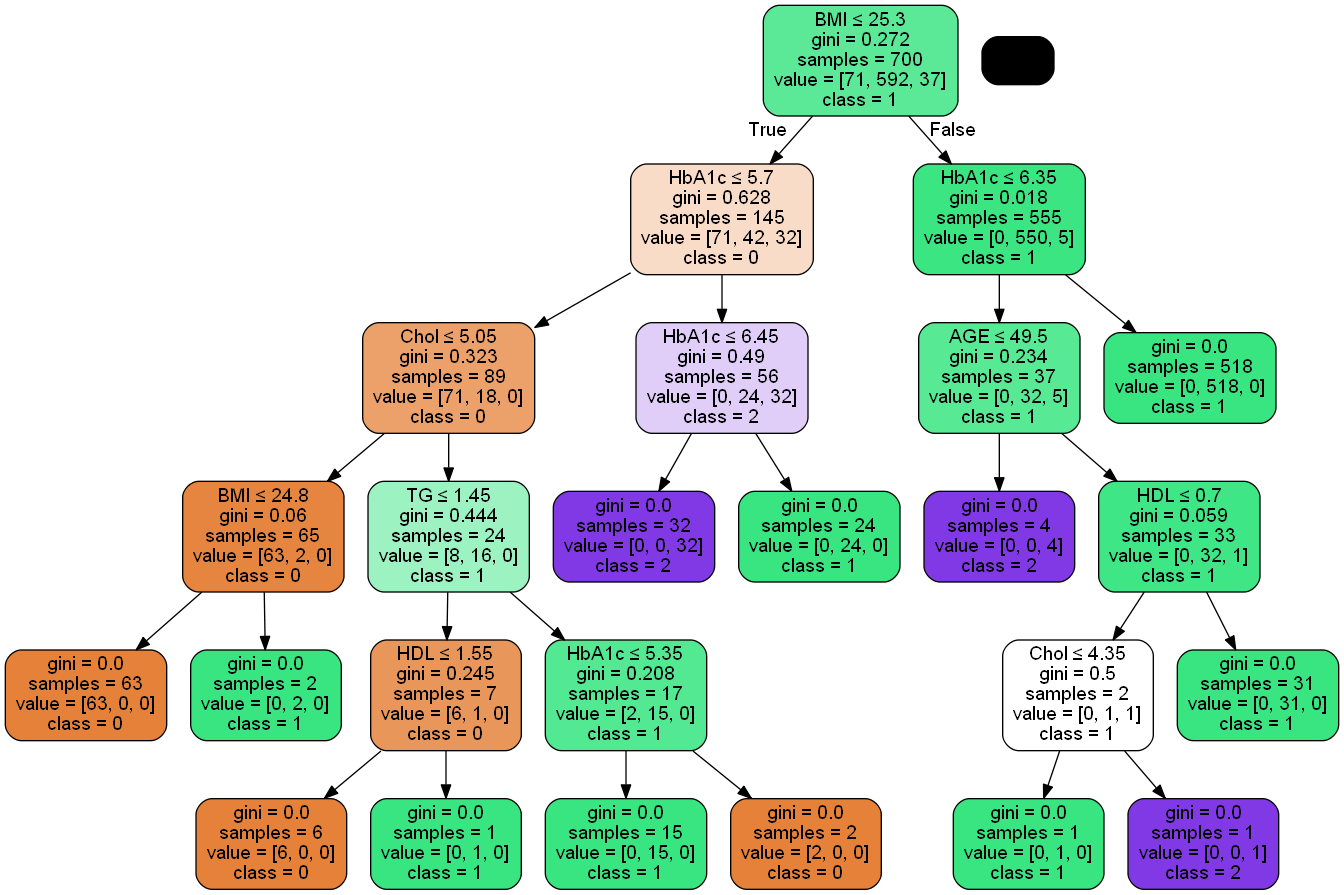

In [66]:
def impArb():
    
    '''Finalmente creamos la funciòn para mostrar la imagen de nuestro àrbol'''
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
print(impArb.__doc__)
Image(graph.create_png())

In [68]:
def clasifiOb():
    
    '''Creamos el objeto  clasificador, lo entrenamos, predecimos la respuesta y finalmente hacemos la precision del modelo'''

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(clasifiOb.__doc__)

Accuracy: 0.9533333333333334
Creamos el objeto  clasificador, lo entrenamos, predecimos la respuesta y finalmente hacemos la precision del modelo
